<a href="https://colab.research.google.com/github/Unnimayav/Employee-attrition/blob/main/Employee_attrition_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importung all the necessary packages
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')


In [ ]:
#load the dataset
df=pd.read_csv("/content/drive/MyDrive/data sets/Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
#info about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#displaying first 5 data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#dupliate values
print(df.duplicated().value_counts())

False    1470
Name: count, dtype: int64


In [ ]:
#null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#displaying all the columns
pd.set_option('display.max_columns',None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
#display column name
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#identify numerical and categorical columns
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns


In [ ]:
print(numerical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
print(categorical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'Attrition':
['Yes' 'No']

Unique values in column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in column 'Department':
['Sales' 'Research & Development' 'Human Resources']

Unique values in column 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values in column 'MaritalStatus':
['Single' 'Married' 'Divorced']

Unique values in column 'Over18':
['Y']

Unique values in column 'OverTime':
['Yes' 'No']



In [ ]:


le=LabelEncoder()
cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for column in cols:
  df[column]=le.fit_transform(df[column])
  #print(df.columns)

In [ ]:
#Binary data
df['OverTime']=df['OverTime'].map({'No':0,'Yes':1})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,1,23,2,3,1,2061,3,0,41,4,2,2,4,1,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,1,2062,4,0,42,2,3,0,1,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,2,155,1,4,3,1,1,2064,2,0,87,4,2,4,2,1,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,1,1023,2,2,3,3,1,2065,4,0,63,2,2,7,2,1,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [ ]:

#Remove unwanted columns
df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,1,23,2,3,3,0,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,4,0,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,2,155,1,4,3,1,2,0,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,1,1023,2,2,3,3,4,0,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
#x=features
X = df.iloc[:, ~df.columns.isin(['Attrition'])]
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,0,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,0,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,0,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,0,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
# Target data
y=df.iloc[:,1]
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [ ]:
#scale and trasnform
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X


array([[0.54761905, 1.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.03793844, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65926986, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 1.        , 0.37652112, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
X_train.shape

(1029, 30)

In [ ]:
y_train.shape

(1029,)

In [ ]:
X_test.shape

(441, 30)

In [ ]:
y_test.shape

(441,)

In [ ]:
#Using algorithms
#rf,svc,knn,adaboost
nb=GaussianNB()
rf = RandomForestClassifier(n_estimators=100,random_state = 1)
ad = AdaBoostClassifier(random_state=1)
sv = SVC(kernel='poly')
knn = KNeighborsClassifier(n_neighbors=4)
dt=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
accuracy_value=[]


In [ ]:
model1  = [nb,rf,ad,sv,knn,dt]
for i in model1 :
  print('***********************************',i,'*****************************')
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print(classification_report(y_test,y_pred))
  print("Accuracy score=",accuracy_score(y_test,y_pred)*100)
  accuracy_value.append(accuracy_score(y_test,y_pred)*100)


*********************************** GaussianNB() *****************************
              precision    recall  f1-score   support

          No       0.91      0.85      0.88       370
         Yes       0.43      0.58      0.49        71

    accuracy                           0.81       441
   macro avg       0.67      0.72      0.69       441
weighted avg       0.84      0.81      0.82       441

Accuracy score= 80.95238095238095
*********************************** RandomForestClassifier(random_state=1) *****************************
              precision    recall  f1-score   support

          No       0.87      0.98      0.92       370
         Yes       0.74      0.24      0.36        71

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441

Accuracy score= 86.39455782312925
*********************************** AdaBoostClassifier(random_state=1) ***********************

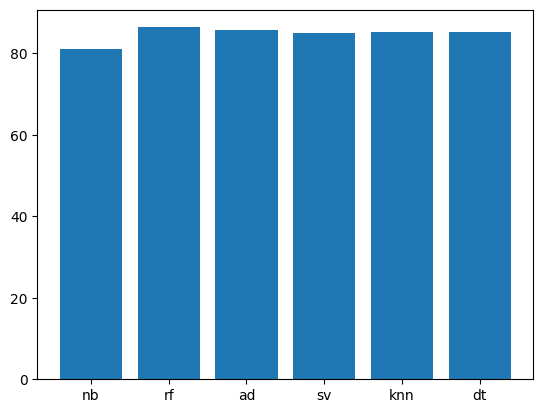

In [ ]:
#graph on accuracy
X1=["nb","rf","ad","sv","knn","dt"]
y1=accuracy_value
plt.bar(X1,y1)
plt.show()

In [ ]:
#Attrition count
attrition_count = df['Attrition'].value_counts()
attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

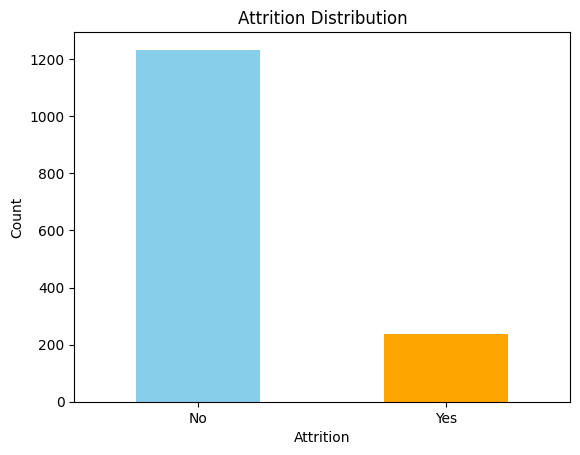

In [ ]:
#Plot for attrition count
attrition_count.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(range(len(attrition_count.index)), ['No', 'Yes'], rotation=0)
plt.show()

In [ ]:
# 1.oversampling
oversample=SMOTE(random_state=1) #object creation of SMOTE
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
y_os.value_counts()

Attrition
Yes    1233
No     1233
Name: count, dtype: int64

In [ ]:
#scale and transform
scaleros=MinMaxScaler()
scaleros.fit(X_os)
X_os=scaleros.transform(X_os)
X_os

array([[0.54761905, 1.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30488768, 1.        , 0.61703405, ..., 0.17345072, 0.0585258 ,
        0.1836537 ],
       [0.83326934, 1.        , 0.48271312, ..., 0.38888889, 0.37801668,
        0.43131985],
       [0.37969664, 1.        , 0.43150726, ..., 0.10461271, 0.        ,
        0.10388574]])

In [ ]:
#Train test split data
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:

nbos=GaussianNB()
rfos= RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200)
ados= AdaBoostClassifier(random_state=1)
svos= SVC(kernel='poly')
knnos= KNeighborsClassifier(n_neighbors=4)
dtos=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
model2= [nbos,rfos,ados,svos,knnos,dtos]
accuracy_valueos=[]
for i in model2 :
  print('***********************************',i,'*****************************')
  i.fit(X_train_os,y_train_os)
  y_pred_os = i.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print("Accuracy score=",accuracy_score(y_test_os,y_pred_os)*100)
  accuracy_valueos.append(accuracy_score(y_test_os,y_pred_os)*100)

*********************************** GaussianNB() *****************************
              precision    recall  f1-score   support

          No       0.73      0.60      0.66       346
         Yes       0.70      0.81      0.75       394

    accuracy                           0.71       740
   macro avg       0.71      0.70      0.70       740
weighted avg       0.71      0.71      0.71       740

Accuracy score= 71.08108108108108
*********************************** RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200) *****************************
              precision    recall  f1-score   support

          No       0.87      0.97      0.91       346
         Yes       0.97      0.87      0.92       394

    accuracy                           0.91       740
   macro avg       0.92      0.92      0.91       740
weighted avg       0.92      0.91      0.91       740

Accuracy score= 91.48648648648648
*********************************** AdaBoostClassifier(ran

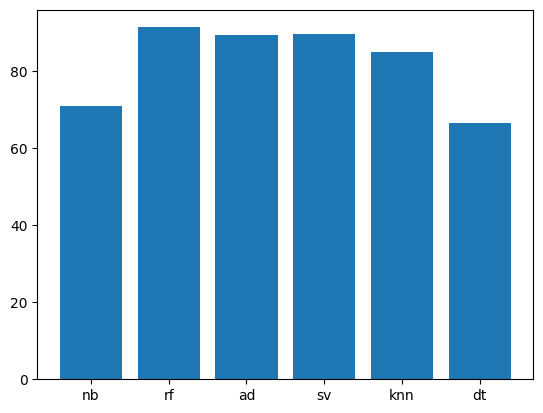

In [ ]:
#graph on accuracy
X2=["nb","rf","ad","sv","knn","dt"]
y2=accuracy_valueos
plt.bar(X2,y2)
plt.show()

In [ ]:
#underSample
undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=undersampler.fit_resample(X,y)


In [ ]:
y_us.value_counts()

Attrition
No     237
Yes    237
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerus=MinMaxScaler()
scalerus.fit(X_us)
X_us=scalerus.transform(X_us)
X_us


array([[0.64285714, 0.        , 0.81492109, ..., 0.88235294, 0.93333333,
        0.26666667],
       [0.30952381, 1.        , 0.80344333, ..., 0.23529412, 0.        ,
        0.13333333],
       [0.38095238, 0.5       , 0.39526542, ..., 0.11764706, 0.46666667,
        0.46666667],
       ...,
       [0.9047619 , 1.        , 0.1492109 , ..., 0.52941176, 0.6       ,
        0.53333333],
       [0.76190476, 0.5       , 0.55667145, ..., 0.17647059, 0.        ,
        0.06666667],
       [0.76190476, 1.        , 0.22094692, ..., 0.11764706, 0.13333333,
        0.        ]])

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)


In [ ]:
models3  = [nb,rf,ad,sv,knn,dt]
accuracy_valueus=[]
confusion=[]
for model3 in models3 :
  print('***********************************',model3,'*****************************')
  model3.fit(X_train_us,y_train_us)
  y_pred_us = model3.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print("Accuracy score=",accuracy_score(y_test_us,y_pred_us)*100)
  accuracy_valueus.append(accuracy_score(y_test_us,y_pred_us)*100)


*********************************** GaussianNB() *****************************
              precision    recall  f1-score   support

          No       0.74      0.57      0.64        68
         Yes       0.68      0.81      0.74        75

    accuracy                           0.70       143
   macro avg       0.71      0.69      0.69       143
weighted avg       0.71      0.70      0.69       143

Accuracy score= 69.93006993006993
*********************************** RandomForestClassifier(random_state=1) *****************************
              precision    recall  f1-score   support

          No       0.67      0.74      0.70        68
         Yes       0.74      0.67      0.70        75

    accuracy                           0.70       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.70      0.70       143

Accuracy score= 69.93006993006993
*********************************** AdaBoostClassifier(random_state=1) ***********************

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,0,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,0,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,0,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,0,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:

# column_names = df.columns
# print(column_names)
corr_matrix=df.corr()
corr_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,-0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.029453,0.032981,0.011716,0.041583,0.001851,0.016547,0.002504,-0.000508,1.000000,0.000478,-0.017960,0.039403,0.039723,-0.033252,0.047183,0.031858,0.041482,0.039147,0.041924,-0.002733,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599


In [ ]:

correlation_with_target = corr_matrix['Attrition']
correlation_threshold = 0.15
columns_to_remove = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index
columns_to_remove

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

In [ ]:

data_filtered = df.drop(columns=columns_to_remove)
df1=data_filtered

In [ ]:
df1

,Age,Attrition,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,5993,1,8,4,5
1,49,0,2,1,5130,0,10,7,7
2,37,1,1,2,2090,1,7,0,0
3,33,0,1,1,2909,1,8,7,0
4,27,0,1,1,3468,0,6,2,2
...,...,...,...,...,...,...,...,...,...
1465,36,0,2,1,2571,0,17,2,3
1466,39,0,3,1,9991,0,9,7,7
1467,27,0,2,1,6142,1,6,2,3
1468,49,0,2,1,5390,0,17,6,8


<Axes: >

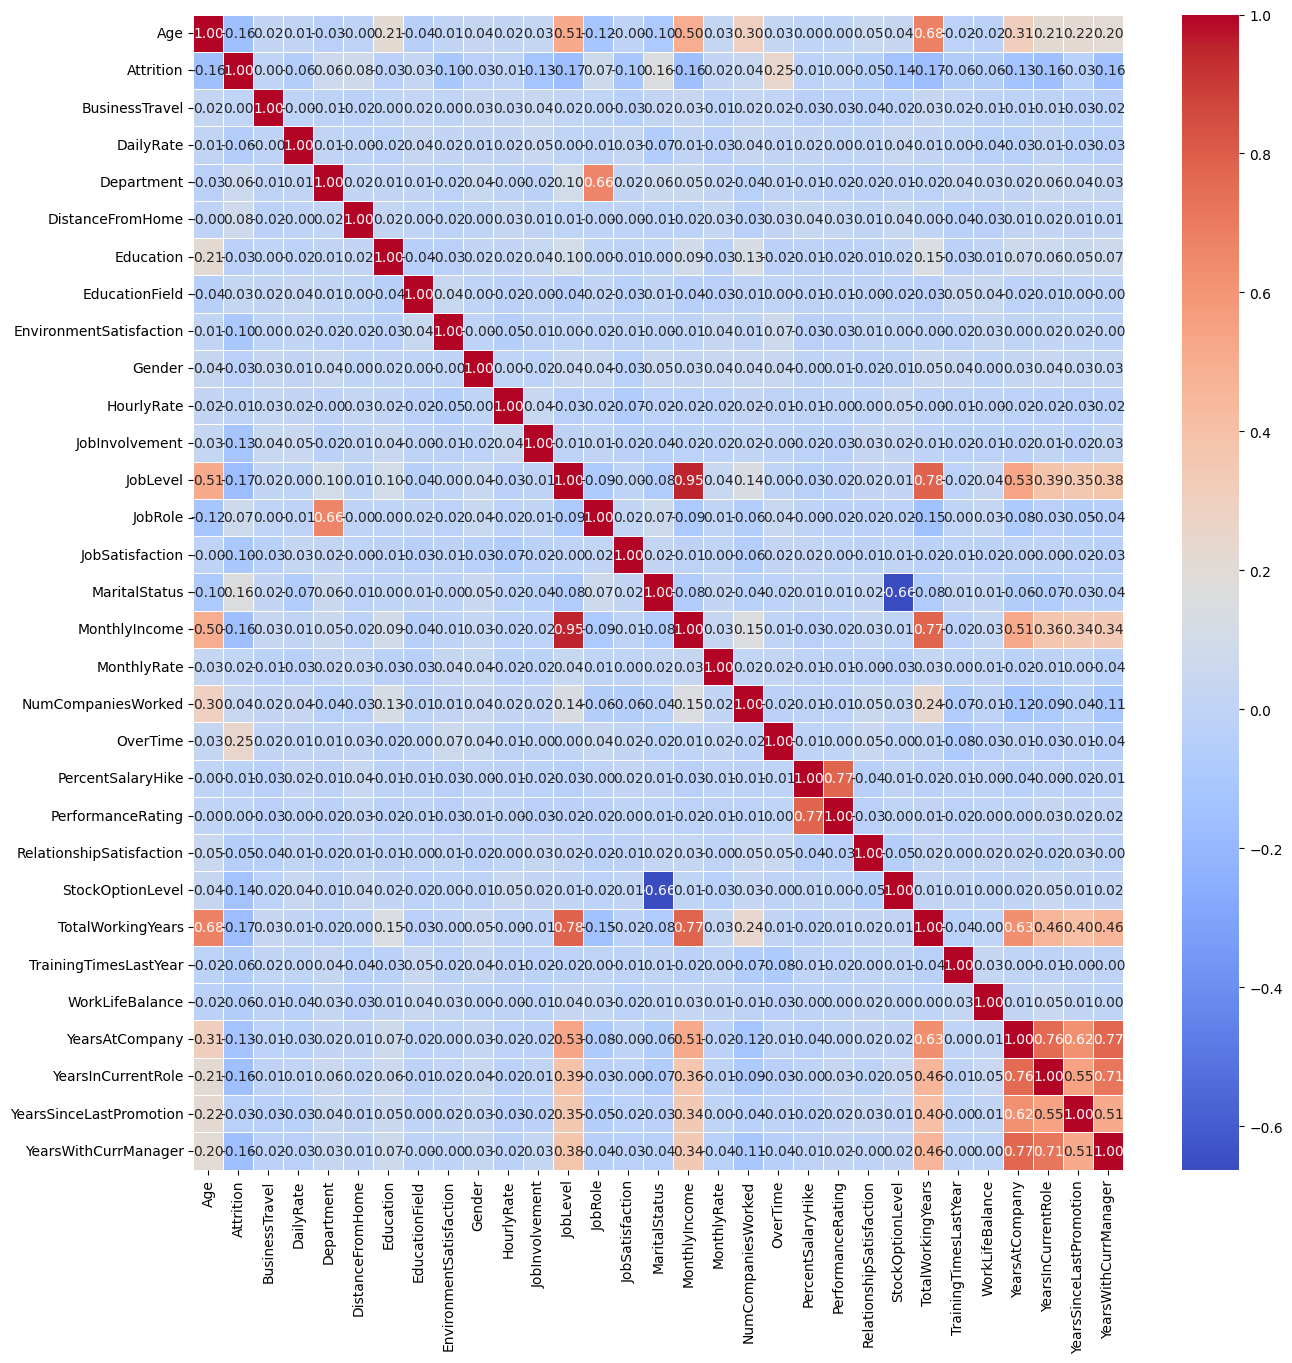

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [ ]:
print(f"The Employee attrition dataset has {df1.shape[0]} rows and {df1.shape[1]} columns")
df1

The Employee attrition dataset has 1470 rows and 9 columns


,Age,Attrition,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,5993,1,8,4,5
1,49,0,2,1,5130,0,10,7,7
2,37,1,1,2,2090,1,7,0,0
3,33,0,1,1,2909,1,8,7,0
4,27,0,1,1,3468,0,6,2,2
...,...,...,...,...,...,...,...,...,...
1465,36,0,2,1,2571,0,17,2,3
1466,39,0,3,1,9991,0,9,7,7
1467,27,0,2,1,6142,1,6,2,3
1468,49,0,2,1,5390,0,17,6,8


In [ ]:
# X = #Train test split data
Xnew=df1.iloc[:, ~df1.columns.isin(['Attrition'])]
Xnew

,Age,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
0,41,2,2,5993,1,8,4,5
1,49,2,1,5130,0,10,7,7
2,37,1,2,2090,1,7,0,0
3,33,1,1,2909,1,8,7,0
4,27,1,1,3468,0,6,2,2
...,...,...,...,...,...,...,...,...
1465,36,2,1,2571,0,17,2,3
1466,39,3,1,9991,0,9,7,7
1467,27,2,1,6142,1,6,2,3
1468,49,2,1,5390,0,17,6,8


In [ ]:

ynew = df1['Attrition']  # Target
ynew

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
#scale and transform
scaler1=MinMaxScaler()
scaler1.fit(Xnew)
Xnew=scaler1.transform(Xnew)
Xnew

array([[0.54761905, 0.25      , 1.        , ..., 0.2       , 0.22222222,
        0.29411765],
       [0.73809524, 0.25      , 0.5       , ..., 0.25      , 0.38888889,
        0.41176471],
       [0.45238095, 0.        , 1.        , ..., 0.175     , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.25      , 0.5       , ..., 0.15      , 0.11111111,
        0.17647059],
       [0.73809524, 0.25      , 0.5       , ..., 0.425     , 0.33333333,
        0.47058824],
       [0.38095238, 0.25      , 0.5       , ..., 0.15      , 0.16666667,
        0.11764706]])

In [ ]:
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.3,random_state=1)


In [ ]:
nb1=GaussianNB()
rf1 = RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200)
ad1 = AdaBoostClassifier(random_state=1)
sv1= SVC(kernel='poly')
knn1 = KNeighborsClassifier(n_neighbors=4)
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
accuracy_valuenew=[]

In [ ]:
modelnew  = [nb1,rf1,ad1,sv1,knn1,dt1]
for i in modelnew :
  print('***********************************',i,'*****************************')
  i.fit(Xnew_train,ynew_train)
  ynew_pred = i.predict(Xnew_test)
  print(classification_report(ynew_test,ynew_pred))
  print("Accuracy score=",accuracy_score(ynew_test,ynew_pred)*100)
  accuracy_valuenew.append(accuracy_score(ynew_test,ynew_pred)*100)

*********************************** GaussianNB() *****************************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       364
           1       0.43      0.43      0.43        77

    accuracy                           0.80       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.80      0.80      0.80       441

Accuracy score= 80.04535147392289
*********************************** RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200) *****************************
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       364
           1       0.72      0.17      0.27        77

    accuracy                           0.84       441
   macro avg       0.79      0.58      0.59       441
weighted avg       0.83      0.84      0.80       441

Accuracy score= 84.35374149659864
*********************************** AdaBoostClassifier(ran

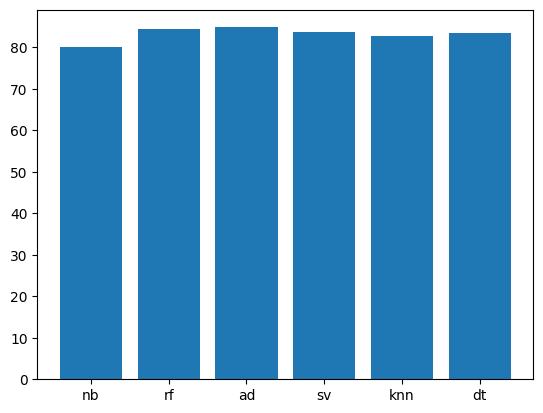

In [ ]:
#graph on accuracy
X3=["nb","rf","ad","sv","knn","dt"]
y3=accuracy_valuenew
plt.bar(X3,y3)
plt.show()

In [ ]:

base_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# base_model = RandomForestClassifier()

In [ ]:
random_search = RandomizedSearchCV(base_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=2)


In [ ]:

random_search.fit(Xnew_train, ynew_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=2, scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [ ]:
best_model = random_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:

ynew_pred = best_model.predict(Xnew_test)

In [ ]:

# Evaluate the best model
accuracy = accuracy_score(ynew_test, ynew_pred)
print("Test Accuracy of the Best Model:", accuracy)

Test Accuracy of the Best Model: 0.8390022675736961


In [ ]:

# 1.oversampling
oversample=SMOTE(random_state=1) #object creation of SMOTE
X_osnew,y_osnew=oversample.fit_resample(Xnew,ynew)

In [ ]:

#scale and transform
scalernew=MinMaxScaler()
scalernew.fit(X_osnew)
X_osnew=scalernew.transform(X_osnew)
X_osnew


array([[0.54761905, 0.25      , 1.        , ..., 0.2       , 0.22222222,
        0.29411765],
       [0.73809524, 0.25      , 0.5       , ..., 0.25      , 0.38888889,
        0.41176471],
       [0.45238095, 0.        , 1.        , ..., 0.175     , 0.        ,
        0.        ],
       ...,
       [0.21137826, 0.        , 0.5       , ..., 0.13902641, 0.11111111,
        0.11764706],
       [0.67432588, 0.75      , 1.        , ..., 0.56662187, 0.46306251,
        0.70619855],
       [0.4047619 , 0.        , 0.        , ..., 0.11330287, 0.09811431,
        0.10388574]])

In [ ]:
X_train_osnew,X_test_osnew,y_train_osnew,y_test_osnew=train_test_split(X_osnew,y_osnew,test_size=0.3,random_state=1)


In [ ]:

models4 = [nb1,rf1,ad1,sv1,knn1,dt1]
accuracy_valueosnew=[]
for i in models4 :
  print('***********************************',i,'*****************************')
  i.fit(X_train_osnew,y_train_osnew)
  y_pred_osnew = i.predict(X_test_osnew)
  print(classification_report(y_test_osnew,y_pred_osnew))
  print("Accuracy score=",accuracy_score(y_test_osnew,y_pred_osnew)*100)
  accuracy_valueosnew.append(accuracy_score(y_test_osnew,y_pred_osnew)*100)

*********************************** GaussianNB() *****************************
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       346
           1       0.65      0.78      0.71       394

    accuracy                           0.66       740
   macro avg       0.67      0.66      0.65       740
weighted avg       0.67      0.66      0.66       740

Accuracy score= 66.48648648648648
*********************************** RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200) *****************************
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       346
           1       0.87      0.79      0.83       394

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740

Accuracy score= 82.70270270270271
*********************************** AdaBoostClassifier(ran

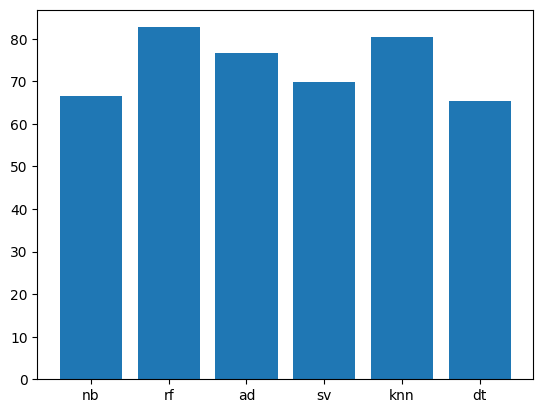

In [ ]:
#graph on accuracy
X4=["nb","rf","ad","sv","knn","dt"]
y4=accuracy_valueosnew
plt.bar(X4,y4)
plt.show()

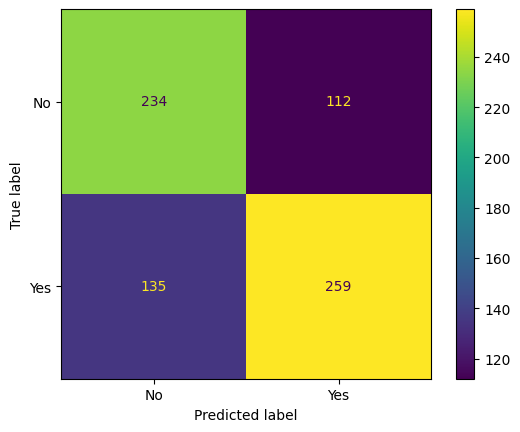

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))


In [ ]:
y_new=rfos.predict(scaleros.transform([[27,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2]])) #direct value will not give correct output asthe values are number but trained data is in o to 1range
if y_new==1:
  print("Attrition")
else:
  print("No Attrition")
print(y_new)
  # take new values from the table itself to check the prediction values

No Attrition
['No']
